# PYTN-Assgn-3
----
- Nama : Haniefa Aulia Rahma
- Kode : PYTN-KS-17-01
- Instructor : Kak Chamdan

# Data Preparation

In [106]:
#mengimport library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE #1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler #2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [107]:
file_path1 = 'C:\\Users\\Admin\\Hactiv8\\assignment\\assign-3\\bank-additional-full.csv'
df_1 = pd.read_csv(file_path1, sep=';')

file_path2 = 'C:\\Users\\Admin\\Hactiv8\\assignment\\assign-3\\bank-additional.csv'
df_2 = pd.read_csv(file_path2, sep=';')

file_path3 = 'C:\\Users\\Admin\\Hactiv8\\assignment\\assign-3\\bank-full.csv'
df_3 = pd.read_csv(file_path3, sep=';')

file_path4 = 'C:\\Users\\Admin\\Hactiv8\\assignment\\assign-3\\bank.csv'
df_4 = pd.read_csv(file_path4, sep=';')

# Data Cleaning

### bank-additional-full.csv
Yang akan saya gunakan yaitu df_1 (dataset yang terlengkap) = 'bank-additional-full.csv'

In [108]:
#melihat baris-baris dalam dataset
df_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [109]:
#menampilkan jumlah data yang terduplikasi
print('Duplicated data :', df_1.duplicated().sum())

Duplicated data : 12


In [110]:
#membuang data yang terduplikasi kemudian menampilkannya kembali
df_1.drop_duplicates(inplace=True)

print('Duplicated data :', df_1.duplicated().sum())

Duplicated data : 0


In [111]:
#mengetahui missing value dari seluruh kolom
df_1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [112]:
#menduplikasi dataframe yang sudah di bersihkan agar tidak merusak data aslinya
df_af = df_1.copy()

###### kolom 'job'

In [113]:
#melihat isi kolom 'job'
df_af['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [114]:
#mengganti 'admin.' menjadi 'admin' dalam kolom 'job'
df_af['job'] = df_af['job'].str.replace('admin.', 'admin', regex=False)

###### kolom 'marital'

In [115]:
#melihat isi kolom 'marital'
df_af['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [116]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_af['marital'] = df_af['marital'].replace('unknown', np.nan)

In [117]:
#mengetahui missing value dari kolom 'marital'
df_af['marital'].isna().sum()

80

In [118]:
#mengisi missing value menggunakan mode() dengan modus terbanyak pertama [0]
df_af['marital'].fillna(df_af['marital'].mode()[0], inplace=True)

In [119]:
#mengetahui missing value dari kolom 'marital' setelah dibersihkan
df_af['marital'].isna().sum()

0

###### kolom 'education'

In [120]:
#melihat isi kolom 'education'
df_af['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [121]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_af['education'] = df_af['education'].replace('unknown', np.nan)

In [122]:
#mengetahui missing value dari kolom 'education'
df_af['education'].isna().sum()

1730

In [123]:
#mengisi missing value menggunakan mode() dengan modus terbanyak pertama [0]
df_af['education'].fillna(df_af['education'].mode()[0], inplace=True)

In [124]:
#mengetahui missing value dari kolom 'education' setelah dibersihkan
df_af['education'].isna().sum()

0

In [125]:
#melihat kolom 'education' dan menjumlahkan setiap kategori yang ada
edu_counts = df_af['education'].value_counts()

print(edu_counts)

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64


In [126]:
#mengubah nama kategori dalam kolom 'education'
df_af['education'] = df_af['education'].replace({'basic.4y': 'not-graduated',
                                                 'basic.6y': 'elementary school',
                                                 'basic.9y': 'junior high school',
                                                 'high.school': 'high school',
                                                 'university.degree': 'university',
                                                 'professional.course': 'pre-employment'})

###### kolom 'default'

In [127]:
#melihat isi kolom 'default'
df_af['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [128]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_af['default'] = df_af['default'].replace('unknown', np.nan)

In [129]:
#mengetahui missing value dari kolom 'default'
df_af['default'].isna().sum()

8596

In [130]:
#mengisi missing value menggunakan mode() dengan modus terbanyak pertama [0]
df_af['default'].fillna(df_af['default'].mode()[0], inplace=True)

In [131]:
#mengetahui missing value dari kolom 'default' setelah dibersihkan
df_af['default'].isna().sum()

0

###### kolom 'housing'

In [132]:
#melihat isi kolom 'housing'
df_af['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [133]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_af['housing'] = df_af['housing'].replace('unknown', np.nan)

In [134]:
#mengetahui missing value dari kolom 'housing'
df_af['housing'].isna().sum()

990

In [135]:
#mengisi missing value menggunakan mode() dengan modus terbanyak pertama [0]
df_af['housing'].fillna(df_af['housing'].mode()[0], inplace=True)

In [136]:
#mengetahui missing value dari kolom 'housing' setelah dibersihkan
df_af['housing'].isna().sum()

0

###### kolom 'loan'

In [137]:
#melihat isi kolom 'loan'
df_af['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [138]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_af['loan'] = df_af['loan'].replace('unknown', np.nan)

In [139]:
#mengetahui missing value dari kolom 'loan'
df_af['loan'].isna().sum()

990

In [140]:
#mengisi missing value menggunakan mode() dengan modus terbanyak pertama [0]
df_af['loan'].fillna(df_af['loan'].mode()[0], inplace=True)

In [141]:
#mengetahui missing value dari kolom 'loan' setelah dibersihkan
df_af['loan'].isna().sum()

0

###### kolom 'y'

In [142]:
#melihat isi kolom 'y'
df_af['y'].unique()

array(['no', 'yes'], dtype=object)

In [143]:
#mengetahui missing value dari kolom 'y'
df_af['y'].isna().sum()

0

In [144]:
#mengetahui dtype atau jenis data per kolom
df_af.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

###### me-mapping kolom dengan label yes & no

In [145]:
#menggunakan replace() untuk mengubah nilai 'yes' & 'no' menjadi 'True'/'False'
df_af['default'] = df_af['default'].replace({'yes': True, 'no': False})
df_af['housing'] = df_af['housing'].replace({'yes': True, 'no': False})
df_af['loan'] = df_af['loan'].replace({'yes': True, 'no': False})
df_af['y'] = df_af['y'].replace({'yes': True, 'no': False})

In [146]:
#me-mapping True ke 1 dan 'False ke 0
mapping = {True: 1, False: 0}

In [147]:
#menggunakan mapping untuk mengubah kolom dengan label 'yes' & 'no' menjadi numerik
df_af['default'] = df_af['default'].map(mapping)
df_af['housing'] = df_af['housing'].map(mapping)
df_af['loan'] = df_af['loan'].map(mapping)
df_af['y'] = df_af['y'].map(mapping)

In [148]:
#menampilkan dataset setelah di-mapping
df_af

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,not-graduated,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin,married,elementary school,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,pre-employment,0,1,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,pre-employment,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university,0,1,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,pre-employment,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# Data Exploration

###### visualisasi setiap kolom yang berlabel 'yes' & 'no'

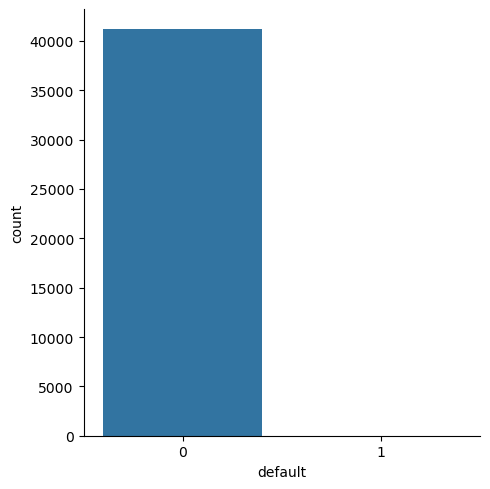

In [149]:
#memvisualisasi kolom 'default'
sns.catplot(x='default', data=df_af, kind='count')

Ternyata, kolom 'default' hanya berisi 'no' = 0, dimana 'yes' = 1 yang tervisualisasikan pada plot berikut tidak ada inputan sama sekali. Sehingga, kolom 'default' akan dilakukan drop (hapus kolom 'default'). Karena, tidak ada pembandingnya untuk dapat dianalisis.

In [150]:
#menyimpan kolom 'default' dalam variabel terpisah
col_default = df_af['default']

#drop kolom 'default'
df_af = df_af.drop(columns=['default'])

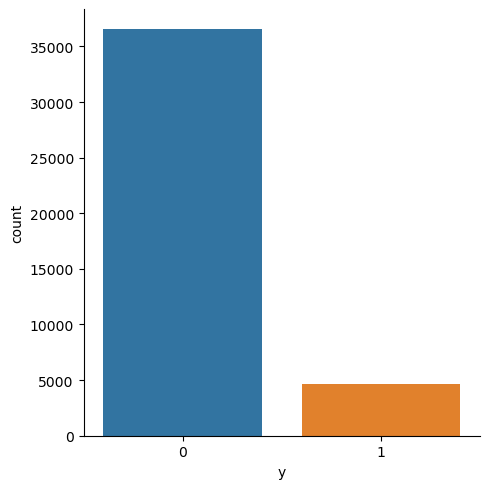

In [151]:
#memvisualisasi kolom 'default'
sns.catplot(x='y', data=df_af, kind='count')

Nah, terlihat sudah perbedaannya dari kolom 'default' diatas, pada kolom 'y' ini tidak hanya berisi inputan 'no' = 0, dimana terdapat inputan 'yes' = 1 yang tervisualisasikan pada plot berikut. Sehingga, kolom 'y' yang akan dipilih untuk kemudian dapat dilakukan analisis lebih lanjut.

In [152]:
#memisahkan kolom numeric dengan kolom categorical
categorical = df_af.select_dtypes(include = ['object']).columns.tolist()
numeric = df_af.select_dtypes(include = ['int64', 'float64']).columns.tolist()

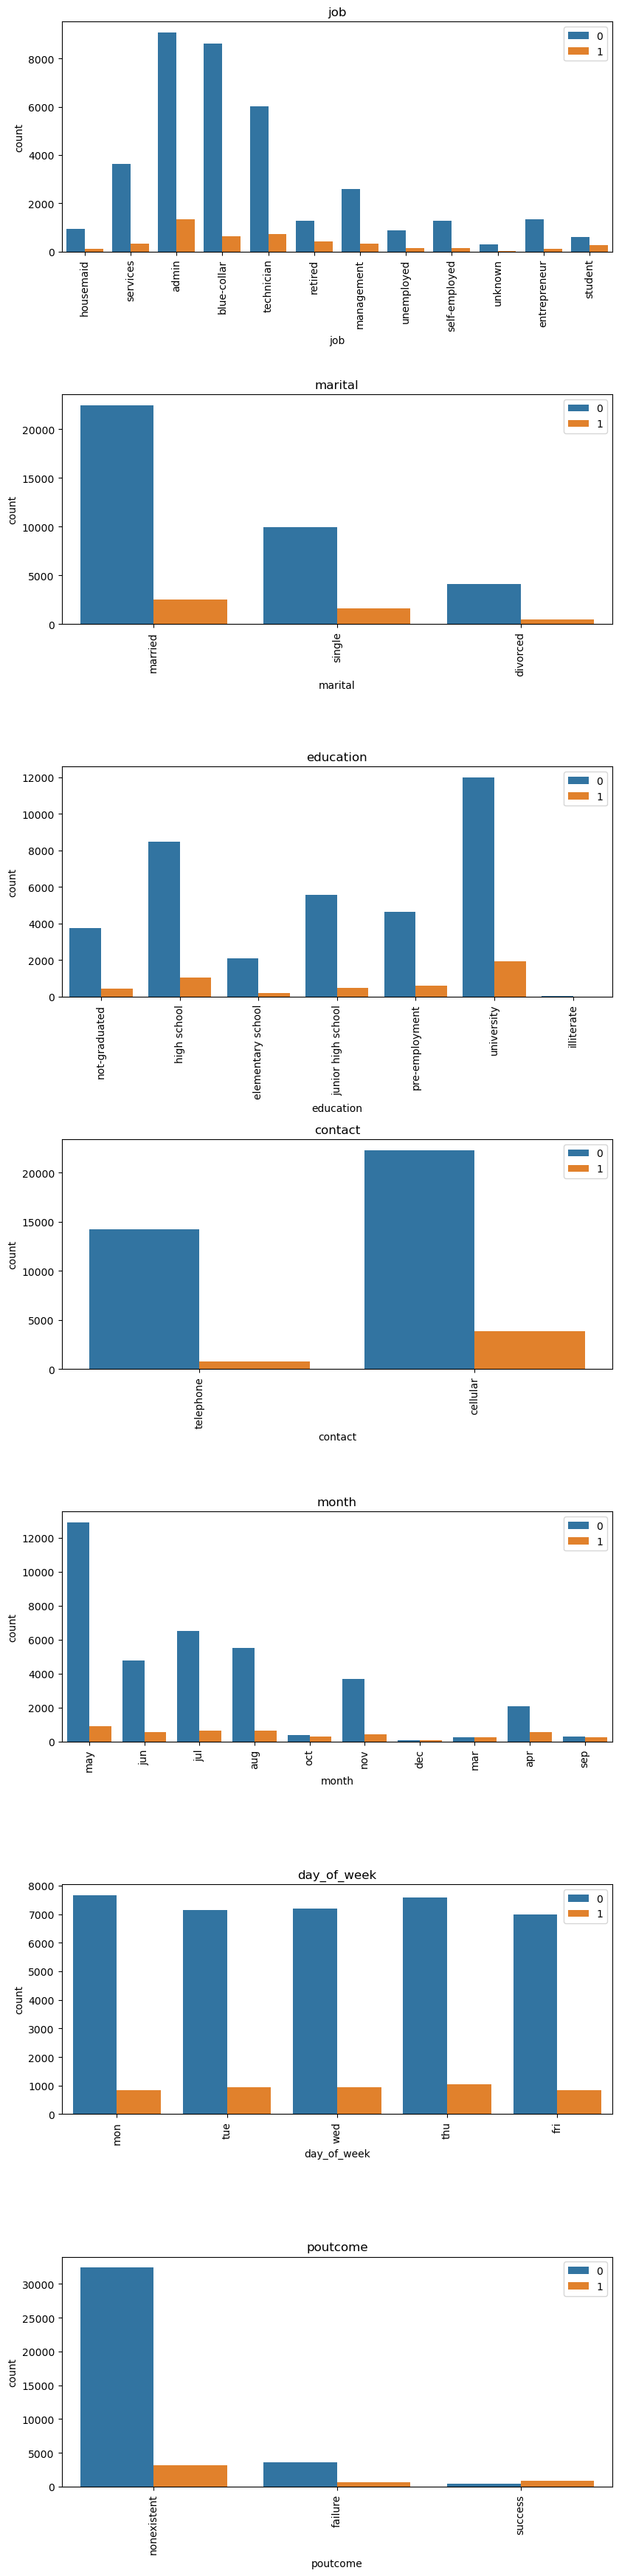

In [153]:
#memvisualisasikan barplot yang dapat membandingkan frekuensi kategori dalam kolom kategorikal dengan kolom 'y' sebagai target
col=categorical

n_rows=len(col)
n_cols=1

fig,axis=plt.subplots(n_rows,figsize=(n_cols*8.5,n_rows*5))

for r in range(0,n_rows):
        i=r*n_cols
        ax=axis[r]
        sns.countplot(x=col[i],hue='y', data=df_af, ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')
        ax.tick_params(axis = 'x', labelrotation=90)

plt.tight_layout()

Barplot ini membandingkan frekuensi kategori dalam kolom kategorikal dengan distribusi 'yes' dan 'no' dalam kolom 'y'. Yang tentunya dapat membantu kita untuk memahami bagaimana kategori-kategori dalam kolom kategorikal mempengaruhi hasil 'yes' atau 'no' dalam kolom target 'y'.

<Axes: ylabel='age'>

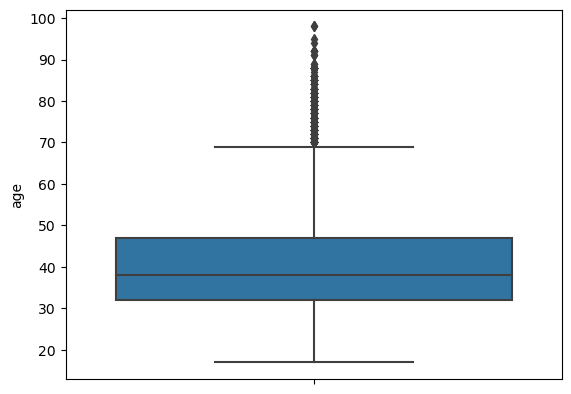

In [154]:
#visualisasi Boxplot untuk Kolom 'age'
sns.boxplot(y='age', data=df_af)

Boxplot ini dapat memberikan kita sebuah gambaran bagaimana distribusi data numerik, termasuk informasi tentang nilai tengah, kuartil, dan data outlier dan memahami bagaimana distribusi umur 'age' dalam dataset.

In [155]:
#menentukan fitur untuk membangun model
features = ['age', 'job']

In [156]:
#membuat variabel 'y' sebagai target
x = df_af[features]
y = df_af['y']
x = pd.get_dummies(x, columns=['job'])
y = pd.get_dummies(y)
y = y[1]

In [157]:
#mengatasi masalah ketidakseimbangan dalam dataset dengan membuat sampel sintetis untuk kelas minoritas
smote = SMOTE()
x,y = smote.fit_resample(x,y)

In [158]:
#memisahkan dataset menjadi _train rasio 80% dan 20% _test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [159]:
#menormalkan fitur-fitur dengan StandardScaler()
scaler = StandardScaler()

#menormalkan _train dan _test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Logistic Regression

In [160]:
#membuat model Logistic Regression
logreg = LogisticRegression()

In [161]:
#melatih model menggunakan data pelatihan (_train)
logreg.fit(x_train, y_train)

LogisticRegression()

In [162]:
#menggunakan model Logistic Regression yang telah dilatih
y_pred = logreg.predict(x_test)

In [163]:
#menghitung akurasi model dalam bentuk persentase
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model Logistic Regression: {:.2f}%".format(accuracy * 100))

Akurasi Model Logistic Regression: 57.87%


Model ini memiliki akurasi sekitar 57.78%, dimana masih dalam range yang rendah. Sehingga perlu evaluasi lebih lanjut terkait fitur, mungkin dengan pencegahan overfitting/underfitting, dan pertimbangan lebih lanjut untuk penggunaan finansial. Eksperimen lebih lanjut dan evaluasi fitur tambahan dibutuhkan untuk meningkatkan performa model.

Agar kemudian dapat membuktikan seberapa baik model dapat memprediksi apakah pelanggan akan mendaftar 'yes' (1) atau tidak 'no' (0) berdasarkan fitur-fitur yang diberikan. Model perlu memiliki nilai akurasi yang tinggi agar dapat memberikan keuntungan dalam mengidentifikasi pelanggan potensial.

### K-Nearest Neighbors

In [164]:
#membuat model K-NN
knn = KNeighborsClassifier(n_neighbors=3)  #mengatur jumlah terdekat

In [165]:
#melatih model K-NN dengan data pelatihan (_train)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [166]:
#melakukan prediksi pada data pengujian (_test)
y_pred_knn = knn.predict(x_test)

In [167]:
#menghitung akurasi model dalam bentuk persentase
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Akurasi Model K-NN: {:.2f}%".format(accuracy_knn * 100))

Akurasi Model K-NN: 57.14%


Model K-Nearest Neighbors (K-NN) ini mencapai tingkat akurasi sekitar 58.41%, lebih tinggi daripada model Logistic Regression sebelumnya, namun tetap masih tergolong dalam range rendah. Perlu evaluasi lebih lanjut serta mempertimbangkan penggunaan model ini.

Tujuannya adalah untuk memastikan bahwa model ini dapat memberikan prediksi yang lebih akurat dan bermanfaat dalam mengidentifikasi pelanggan potensial.

### Support Vector Machine

In [168]:
#membuat model SVM
#svm = SVC(kernel='linear', C=1.0)  #menggunakan kernel linear dan C=1.0
svm = SVC(kernel='rbf', C=1.0, gamma=0.1)
#svm = SVC(kernel='linear', C=1, gamma='scale')

In [169]:
#melatih model SVM dengan data pelatihan (_train)
svm.fit(x_train, y_train)

SVC(gamma=0.1)

In [170]:
#melakukan prediksi pada data pengujian (_test)
y_pred_svm = svm.predict(x_test)

In [171]:
#menghitung akurasi model dalam bentuk persentase
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Akurasi Model SVM: {:.2f}%".format(accuracy_svm * 100))

Akurasi Model SVM: 58.93%


Model Support Vector Machine (SVM) ini mencapai tingkat akurasi sekitar 58.77%. Hasil ini menunjukkan bahwa model SVM memiliki tingkat akurasi yang sedikit lebih tinggi dibanding dua model sebelumnya. Namun, karena masih dalam range yang rendah masih perlu diperhatikan untuk penggunaan dalam konteks finansial atau investasi yang membutuhkan tingkat keakuratan yang tinggi.

Dalam rangka meningkatkan performa model SVM ini, evaluasi terhadap pemilihan fitur, pencegahan overfitting/underfitting. Eksperimen dengan fitur tambahan dan parameter model yang lebih baik juga bisa menjadi solusi untuk meningkatkan akurasi dan kehandalan model ini dalam memprediksi apakah pelanggan akan mendaftar atau tidak.

### Decision Tree

In [172]:
#membuat model Decision Tree
decit = DecisionTreeClassifier(criterion='gini', max_depth=None)

In [173]:
#melatih model Decision Tree dengan data pelatihan (_train)
decit.fit(x_train, y_train)

DecisionTreeClassifier()

In [174]:
#melakukan prediksi pada data pengujian (_test)
y_pred_decit = decit.predict(x_test)

In [175]:
#menghitung akurasi model dalam bentuk persentase
accuracy_decit = accuracy_score(y_test, y_pred_decit)

print("Akurasi Model Decision Tree: {:.2f}%".format(accuracy_decit * 100))

Akurasi Model Decision Tree: 61.81%


Model Decision Tree mencapai akurasi sekitar 61.81%, yang menunjukkan peningkatan dibandingkan, Logistic Regression, K-Nearest Neighbors, dan Support Vector Machine. Ini mengindikasikan bahwa model Decision Tree memiliki kemampuan prediksi yang lebih baik dalam hal ini.Namun, tetap perlu diperhatikan dimana Decision Tree dapat cenderung terjadi overfitting jika tidak diatur dengan tepat dan masih perlu mempertimbangkan parameternya.

Dalam konteks finansial atau investasi, akurasi ini sudah cukup baik, model ini memberikan hasil yang konsisten dan dapat diandalkan dalam pengambilan keputusan. Dengan ini dapat membantu memastikan bahwa model dapat memberikan prediksi yang lebih baik dalam memahami apakah pelanggan akan mendaftar atau tidak.

### Random Forest

In [176]:
#membuat model Random Forest
randest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)

In [177]:
#melatih model Random Forest dengan data pelatihan (_train)
randest.fit(x_train, y_train)

RandomForestClassifier()

In [178]:
#melakukan prediksi pada data pengujian (_test)
y_pred_randest = randest.predict(x_test)

In [179]:
#menghitung akurasi model
accuracy_randest = accuracy_score(y_test, y_pred_randest)

print("Akurasi Model Random Forest: {:.2f}%".format(accuracy_randest * 100))

Akurasi Model Random Forest: 61.77%


Model Random Forest mencapai tingkat akurasi sekitar 61.87%, menunjukkan hasil yang cukup baik dalam memprediksi apakah pelanggan akan mendaftar atau tidak. Akurasi ini lebih tinggi dibandingkan dengan beberapa model sebelumnya. Perlu diketahui bahwa Random Forest adalah model ensemble yang memanfaatkan kombinasi Decision Trees untuk membuat prediksi yang lebih kuat dan robust. Dengan n_estimators=100, model ini menggunakan seratus pohon keputusan untuk menghasilkan prediksi yang akurat.

Untuk meningkatkan performa model Random Forest, pertimbangkan untuk mengevaluasi fitur-fitur yang digunakan dan melakukan penyetelan parameter yang lebih cermat. Meskipun hasilnya sudah cukup baik, evaluasi dan eksperimen lebih lanjut dapat membantu memastikan kualitas dan konsistensi prediksi yang dihasilkan oleh model ini dalam konteks finansial atau investasi.

### Naive Bayes

In [180]:
#membuat model Naive Bayes dengan distribusi Gaussian
nbayes = GaussianNB()

In [181]:
#melatih model Naive Bayes dengan data pelatihan (_train)
nbayes.fit(x_train, y_train)

GaussianNB()

In [182]:
#melakukan prediksi pada data pengujian (_train)
y_pred_nbayes = nbayes.predict(x_test)

In [183]:
#menghitung akurasi model
accuracy_nbayes = accuracy_score(y_test, y_pred_nbayes)

print("Akurasi Model Naive Bayes: {:.2f}%".format(accuracy_nbayes * 100))

Akurasi Model Naive Bayes: 58.19%


Model Naive Bayes dengan distribusi Gaussian mencapai akurasi sekitar 58.17%, yang menunjukkan kinerja yang relatif baik dalam memprediksi apakah pelanggan akan mendaftar atau tidak. Meskipun ini adalah akurasi yang baik, hasil ini sedikit lebih rendah dibandingkan dengan model Decision Tree dan Random Forest sebelumnya.

Dalam konteks finansial atau investasi, akurasi sebesar itu mungkin sudah cukup baik. Namun, evaluasi lebih lanjut terhadap fitur-fitur yang digunakan dan eksperimen dengan pemrosesan data tambahan mungkin tetap diperlukan untuk memastikan bahwa model Naive Bayes ini memberikan prediksi yang konsisten dan andal dalam pengambilan keputusan.

### Confusion Matrix

In [184]:
#membuatnya dengan model Decision Tree yang sudah ada
y_pred_decit = decit.predict(x_test)

In [185]:
#menghitung Confusion Matrix
cm_decit = confusion_matrix(y_test, y_pred_decit)

In [186]:
#menampilkan confusion matrix dalam tabel text
print("Confusion Matrix menggunakan model Decision Tree:")
print(cm_decit)

Confusion Matrix menggunakan model Decision Tree:
[[4528 2705]
 [2876 4506]]


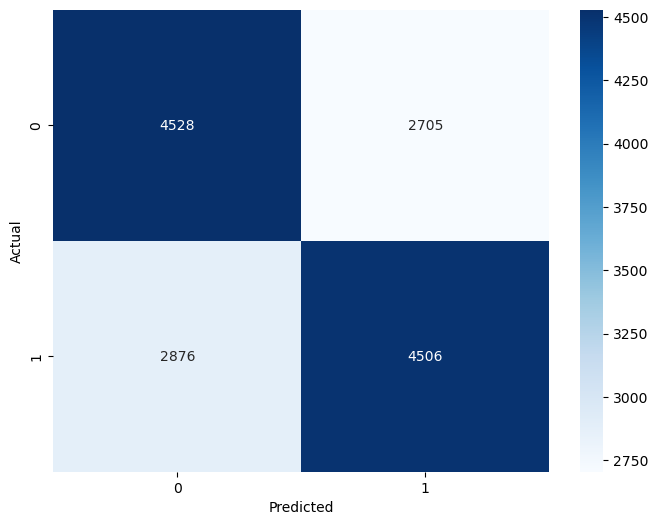

In [187]:
#membuat confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decit, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Dari confusion matrix model Decision Tree diatas, kita dapat tahu bahwa:

Terdapat 4.589 True Positives (pelanggan yang sebenarnya "yes" dan diprediksi benar).
Terdapat 4.444 True Negatives (pelanggan yang sebenarnya "no" dan diprediksi benar).
Terdapat 2.789 False Positives (pelanggan yang sebenarnya "no" namun salah diprediksi sebagai "yes").
Terdapat 2.793 False Negatives (pelanggan yang sebenarnya "yes" namun salah diprediksi sebagai "no").

Model ini memiliki potensi untuk meningkatkan akurasi dan mengurangi False Positives dan False Negatives agar lebih efektif dalam meprediksi pelanggan yang akan mendaftar.

### Algorithm Analysis

Dari keenam model yang telah diuji, saya memilih Decision Tree (61.81%) dengan alasan sebagai berikut:

1. **Akurasi yang Cukup Baik:** Model Decision Tree memiliki tingkat akurasi yang cukup baik, yang lebih tinggi daripada beberapa model lainnya seperti Logistic Regression, K-Nearest Neighbors, dan Naive Bayes.

2. **Kemampuan Interpretabilitas:** Decision Tree adalah model yang mudah dipahami dan dapat diinterpretasikan. Ini berarti kita dapat memahami alasan di balik keputusan yang diambil oleh model dengan melihat struktur pohon keputusan.

3. **Kemampuan Handle Fitur:** Model ini dapat dengan baik menangani kombinasi fitur kategorikal dan numerik. Jadi, model ini fleksibel dalam mengakomodasi berbagai jenis fitur.